<a href="https://colab.research.google.com/github/amihai/notebooks/blob/master/EfficientNetB7-CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__) # Should be > 2.3.0
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

model = tf.keras.applications.EfficientNetB7(
    include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
    pooling=None, classes=1000, classifier_activation=None) # classifier_activation should be None in order to get multiple predictions 

2.3.0
Num GPUs: 0
268328960/268326632 [==============================] - 9s 0us/step


In [2]:
!ls ~/.keras/models/

efficientnetb7.h5


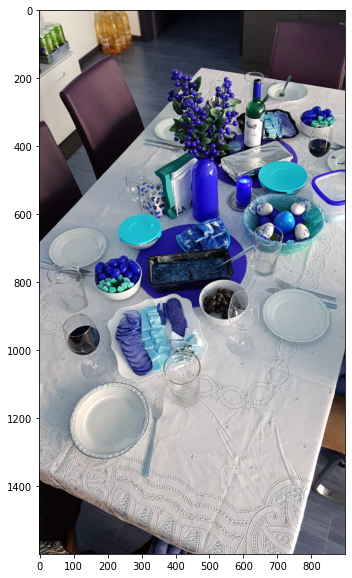

In [3]:
from PIL import Image
import numpy as np
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2

# preprocess input
image = cv2.imread('2.jpg') # You should manually put the file 2.jpg on disk

image_size = model.input_shape[1]
#image = cv2.resize(image, (image_size, image_size))

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

#image = image.resize(((image_size, image_size)))
image = np.expand_dims(image, 0)



# make prediction and decode
y = model.predict(image)
# decode_predictions(y, top=10)

In [4]:
decoded_predictions = tf.keras.applications.efficientnet.decode_predictions(y, top=100)

print(decoded_predictions)

40960/35363 [==================================] - 0s 0us/step
[[('n03201208', 'dining_table', 7.76354), ('n04476259', 'tray', 5.577282), ('n04522168', 'vase', 5.575722), ('n07579787', 'plate', 5.0484858), ('n02948072', 'candle', 4.275546), ('n07930864', 'cup', 4.2678347), ('n02815834', 'beaker', 4.214303), ('n03443371', 'goblet', 4.162466), ('n04270147', 'spatula', 4.034115), ('n03633091', 'ladle', 4.0025544), ('n03961711', 'plate_rack', 3.9522872), ('n07892512', 'red_wine', 3.8266358), ('n04553703', 'washbasin', 3.7612846), ('n03775546', 'mixing_bowl', 3.7289317), ('n04591713', 'wine_bottle', 3.706505), ('n03733805', 'measuring_cup', 3.550791), ('n03950228', 'pitcher', 3.5150442), ('n03920288', 'Petri_dish', 3.4389884), ('n04263257', 'soup_bowl', 3.3771372), ('n04560804', 'water_jug', 3.3352363), ('n04081281', 'restaurant', 3.0602376), ('n03825788', 'nipple', 3.0301359), ('n03637318', 'lampshade', 2.9773152), ('n04493381', 'tub', 2.8640718), ('n03062245', 'cocktail_shaker', 2.8459525

In [5]:
import time

# Performance Testing
number_or_runs = 10 
total_execution_time = 0
for _ in range(number_or_runs):
  start = time.time() 
  y = model.predict(image)
  end = time.time()
  execution_time = end - start
  total_execution_time += execution_time
  print(str(execution_time))

average_execution_time = total_execution_time / number_or_runs
print("Average Execution Time: " + str(average_execution_time))

12.510448217391968
12.4792160987854
12.633177518844604
12.497267007827759
12.483285903930664
12.441175937652588
12.461338996887207
12.505512475967407
12.508516073226929
12.497210264205933
Average Execution Time: 12.501714849472046
